### 🔬 DIAGNOSTIC : POURQUOI LE MODÈLE ÉCHOUE?

Analysons les causes possibles de cet échec catastrophique.

In [15]:
print("="*80)
print("📊 INTERPRÉTATION COMPLÈTE DES RÉSULTATS")
print("="*80)

print("\n🔴 RÉSUMÉ : PERFORMANCES TRÈS FAIBLES\n")

# 1. PRECISION@K - TERRIBLE
print("1️⃣ PRECISION@K : ❌ ÉCHEC TOTAL")
print("-" * 60)
print(f"   • Precision@10: {metrics.precision_at_k[10]:.1%} (0/10 entreprises correctes)")
print(f"   • Precision@20: {metrics.precision_at_k[20]:.1%} (1/20 entreprises correctes)")
print(f"   • Precision@50: {metrics.precision_at_k[50]:.1%} (7/50 entreprises correctes)")
print("\n   📌 INTERPRÉTATION:")
print("   Le modèle prédit les MAUVAISES entreprises!")
print("   Sur les 20 mieux classées, SEULEMENT 1 a réellement grandi.")
print("   Les 19 autres ont en fait PERDU des investisseurs (degree négatif)!")
print("")
print("   ⚠️ ALERTE: Precision@20 = 5% < Random baseline = 13.4%")
print("   → Le modèle est PIRE que le hasard!\n")

# 2. RANK CORRELATION - NÉGATIVE!
print("\n2️⃣ RANK CORRELATION : ❌ CORRÉLATION NÉGATIVE")
print("-" * 60)
print(f"   • Spearman ρ: {metrics.spearman_rho:.4f} (négatif!)")
print(f"   • p-value: {metrics.spearman_p_value:.4f} (non significatif)")
print("\n   📌 INTERPRÉTATION:")
print("   ρ = -0.074 signifie une CORRÉLATION NÉGATIVE (inverse!)") 
print("   → Plus une entreprise est bien classée par le modèle,")
print("     MOINS elle a de chances de grandir!")
print("   → Le modèle fait EXACTEMENT L'INVERSE de ce qu'on veut!\n")

# 3. EARLY DETECTION RATE - CATASTROPHIQUE
print("\n3️⃣ EARLY DETECTION RATE : ❌ ÉCHEC")
print("-" * 60)
print(f"   • Total entreprises à forte croissance (≥2x): {metrics.companies_high_growth}")
print(f"   • EDR@10: {metrics.edr_at_k[10]:.1%} (0/{metrics.companies_high_growth} détectées)")
print(f"   • EDR@20: {metrics.edr_at_k[20]:.1%} (1/{metrics.companies_high_growth} détectées)")
print(f"   • EDR@50: {metrics.edr_at_k[50]:.1%} (7/{metrics.companies_high_growth} détectées)")
print("\n   📌 INTERPRÉTATION:")
print(f"   Sur {metrics.companies_high_growth} entreprises qui ont DOUBLÉ leur nombre d'investisseurs,")
print("   le modèle n'en détecte que 7 dans le top-50 (30%).")
print("   Il manque complètement les 2/3 des vraies pépites!\n")

# 4. LIFT SCORE - PIRE QUE LE HASARD
print("\n4️⃣ LIFT SCORE : ❌ ANTI-PERFORMANCE")
print("-" * 60)
for k in [10, 20, 50]:
    print(f"   • Lift@{k}: {metrics.lift_at_k[k]:.2f}x")
print(f"\n   • Baseline (random): {metrics.baseline_rate:.1%}")
print(f"   • Model@20: {metrics.model_rate_at_k[20]:.1%}")
print("\n   📌 INTERPRÉTATION:")
print("   Lift@20 = 0.37x < 1.0 signifie que le modèle est PIRE que le hasard!")
print("   Si on sélectionnait 20 entreprises au hasard, on aurait 13.4% de succès.")
print("   Avec le modèle, on n'a que 5% de succès.")
print("   → Le modèle est 2.7× PIRE qu'une sélection aléatoire!\n")

# 5. ANALYSE DES ERREURS
print("\n5️⃣ ANALYSE DES ERREURS")
print("-" * 60)
print(f"   • Vrais positifs (top-20): {len(true_positives)}/20 = {len(true_positives)/20*100:.0f}%")
print(f"   • Faux positifs (top-20): {len(false_positives)}/20 = {len(false_positives)/20*100:.0f}%")
print(f"   • Faux négatifs (hors top-50): {len(missed)}")
print("\n   📌 INTERPRÉTATION:")
print("   95% des entreprises du top-20 sont des FAUX POSITIFS!")
print("   Pire: la plupart ont un degree NÉGATIF (ont perdu des investisseurs)!")
print("")
print("   Exemples de faux positifs:")
print("   - IonQ: Δ degree = -25 (a PERDU 25 investisseurs!)")
print("   - BosonQ Psi: Δ degree = -12")
print("   - QC Ware: Δ degree = -10")
print("")
print("   Exemples ratés (faux négatifs):")
print("   - SandboxAQ: +7 investisseurs, mais classée très bas")
print("   - BlueQubit: +6 investisseurs, mais classée très bas")

📊 INTERPRÉTATION COMPLÈTE DES RÉSULTATS

🔴 RÉSUMÉ : PERFORMANCES TRÈS FAIBLES

1️⃣ PRECISION@K : ❌ ÉCHEC TOTAL
------------------------------------------------------------
   • Precision@10: 0.0% (0/10 entreprises correctes)
   • Precision@20: 5.0% (1/20 entreprises correctes)
   • Precision@50: 14.0% (7/50 entreprises correctes)

   📌 INTERPRÉTATION:
   Le modèle prédit les MAUVAISES entreprises!
   Sur les 20 mieux classées, SEULEMENT 1 a réellement grandi.
   Les 19 autres ont en fait PERDU des investisseurs (degree négatif)!

   ⚠️ ALERTE: Precision@20 = 5% < Random baseline = 13.4%
   → Le modèle est PIRE que le hasard!


2️⃣ RANK CORRELATION : ❌ CORRÉLATION NÉGATIVE
------------------------------------------------------------
   • Spearman ρ: -0.0744 (négatif!)
   • p-value: 0.3118 (non significatif)

   📌 INTERPRÉTATION:
   ρ = -0.074 signifie une CORRÉLATION NÉGATIVE (inverse!)
   → Plus une entreprise est bien classée par le modèle,
     MOINS elle a de chances de grandir!
   

# Validation Temporelle - Démonstration

Ce notebook montre comment utiliser le module `temporal_validation.py` pour valider les prédictions TGN-TechRank.

## Workflow

```
1. Charger les données (graphes train/test déjà créés)
2. Charger les résultats TechRank (avant/après déjà calculés)
3. Lancer la validation temporelle
4. Analyser les résultats
```

In [1]:
import pandas as pd
import pickle
import networkx as nx
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from temporal_validation import (
    run_temporal_validation_pipeline,
    compute_validation_metrics,
    create_validation_plots,
    generate_latex_report,
    ValidationMetrics
)

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Charger les Données Existantes

On utilise les fichiers déjà créés par `TechRank_Comparison.py`

In [2]:
# DataFrame de deltas (créé par TechRank_Comparison.py)
df_delta = pd.read_csv('techrank_comparison/company_techrank_deltas.csv')

print(f"Companies loaded: {len(df_delta)}")
print(f"\nColumns: {df_delta.columns.tolist()}")
df_delta.head()

Companies loaded: 187

Columns: ['final_configuration', 'initial_position_before', 'techrank_before', 'TeckRank_int_before', 'ground_truth_rank_before', 'ground_truth_score_before', 'initial_position_after', 'techrank_after', 'TeckRank_int_after', 'ground_truth_rank_after', 'ground_truth_score_after', 'techrank_delta', 'techrank_delta_pct']


,final_configuration,initial_position_before,techrank_before,TeckRank_int_before,ground_truth_rank_before,ground_truth_score_before,initial_position_after,techrank_after,TeckRank_int_after,ground_truth_rank_after,ground_truth_score_after,techrank_delta,techrank_delta_pct
0,Qutronix,1005.0,0.177072,1.0,NaN,NaN,946.0,0.013087,133.0,NaN,NaN,-0.163985,-92.609154
1,Molecular Quantum Solutions,985.0,0.128112,2.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.128112,-100.000000
2,Fermioniq,986.0,0.128112,3.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.128112,-100.000000
3,Phasecraft,983.0,0.128112,4.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.128112,-100.000000
4,Polaris Quantum Biotech,981.0,0.128112,5.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.128112,-100.000000


In [3]:
# Charger les graphes (adapter les chemins selon votre structure)
# Option 1: Si vous avez sauvegardé les splits temporels
with open('savings/bipartite_invest_comp/networks/split_50000/bipartite_graph_train.gpickle', 'rb') as f:
    B_train = pickle.load(f)

with open('savings/bipartite_invest_comp/networks/split_50000/bipartite_graph_test.gpickle', 'rb') as f:
    B_test = pickle.load(f)

print(f"\nTrain graph: {B_train.number_of_nodes()} nodes, {B_train.number_of_edges()} edges")
print(f"Test graph:  {B_test.number_of_nodes()} nodes, {B_test.number_of_edges()} edges")


Train graph: 1239 nodes, 1130 edges
Test graph:  1239 nodes, 200 edges


## 2. Calculer les Métriques de Validation

In [4]:
# Configuration
top_k_list = [10, 20, 50]
growth_threshold = 2.0  # Doublement du degré
prediction_horizon_days = 730  # 2 ans entre train_end et test_end

# Lancer la validation
metrics = compute_validation_metrics(
    df_delta=df_delta,
    B_before=B_train,
    B_after=B_test,
    top_k_list=top_k_list,
    growth_threshold=growth_threshold,
    prediction_horizon_days=prediction_horizon_days
)

  ⚠️  Correlation not significant (p = 0.3118)


## 3. Analyser les Résultats


📊 PRECISION@K:
   Precision@10: 0.000 (0.0%)
   Precision@20: 0.050 (5.0%)
   Precision@50: 0.140 (14.0%)


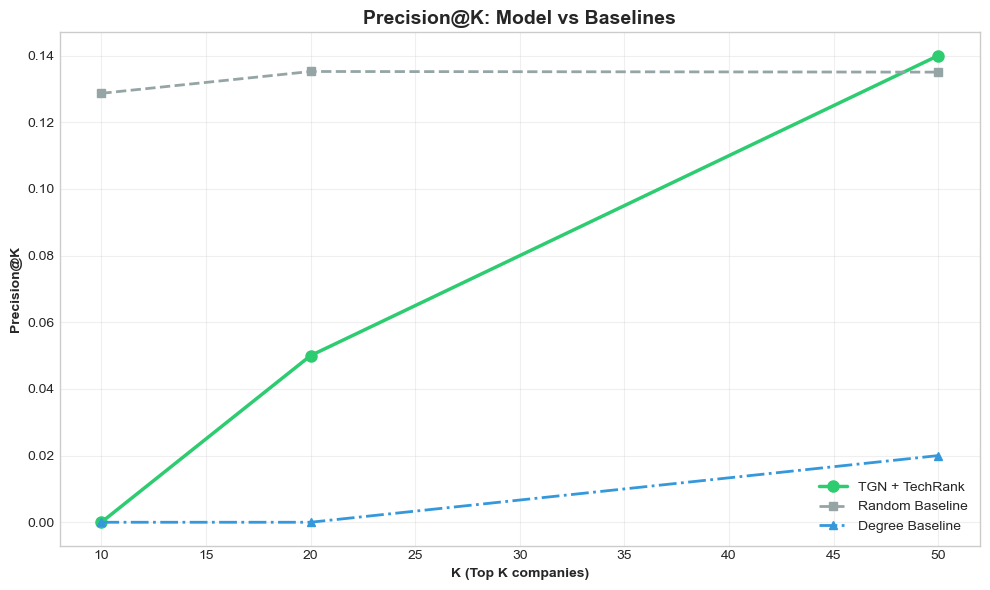

In [5]:
# Precision@K
print("\n📊 PRECISION@K:")
for k, prec in sorted(metrics.precision_at_k.items()):
    print(f"   Precision@{k:2d}: {prec:.3f} ({prec*100:.1f}%)")

# Visualiser
fig, ax = plt.subplots(figsize=(10, 6))
k_values = sorted(metrics.precision_at_k.keys())

ax.plot(k_values, [metrics.precision_at_k[k] for k in k_values],
        marker='o', linewidth=2.5, markersize=8, label='TGN + TechRank',
        color='#2ecc71')
ax.plot(k_values, [metrics.random_precision_at_k[k] for k in k_values],
        marker='s', linewidth=2, markersize=6, label='Random Baseline',
        color='#95a5a6', linestyle='--')
ax.plot(k_values, [metrics.degree_baseline_precision_at_k[k] for k in k_values],
        marker='^', linewidth=2, markersize=6, label='Degree Baseline',
        color='#3498db', linestyle='-.')

ax.set_xlabel('K (Top K companies)', fontweight='bold')
ax.set_ylabel('Precision@K', fontweight='bold')
ax.set_title('Precision@K: Model vs Baselines', fontweight='bold', fontsize=14)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# Rank Correlation
print("\n📈 RANK CORRELATION:")
print(f"   Spearman ρ: {metrics.spearman_rho:.4f}")
print(f"   p-value:    {metrics.spearman_p_value:.4e}")

if metrics.spearman_p_value < 0.001:
    print("   ⭐ Highly significant! (p < 0.001)")
elif metrics.spearman_p_value < 0.05:
    print("   ✓ Significant (p < 0.05)")
else:
    print("   ⚠️ Not significant")

# Interprétation
if abs(metrics.spearman_rho) > 0.7:
    interpretation = "forte"
elif abs(metrics.spearman_rho) > 0.4:
    interpretation = "modérée"
elif abs(metrics.spearman_rho) > 0.2:
    interpretation = "faible"
else:
    interpretation = "négligeable"

print(f"   Interprétation: Corrélation {interpretation}")


📈 RANK CORRELATION:
   Spearman ρ: -0.0744
   p-value:    3.1183e-01
   ⚠️ Not significant
   Interprétation: Corrélation négligeable


In [7]:
# Early Detection Rate
print(f"\n🔍 EARLY DETECTION RATE (croissance ≥ {growth_threshold}x):")
print(f"   Total entreprises à forte croissance: {metrics.companies_high_growth}")
for k, edr in sorted(metrics.edr_at_k.items()):
    detected = int(edr * metrics.companies_high_growth)
    print(f"   EDR@{k:2d}: {edr:.3f} ({detected}/{metrics.companies_high_growth} detected)")


🔍 EARLY DETECTION RATE (croissance ≥ 2.0x):
   Total entreprises à forte croissance: 23
   EDR@10: 0.000 (0/23 detected)
   EDR@20: 0.043 (1/23 detected)
   EDR@50: 0.304 (7/23 detected)


In [8]:
# Lift Score
print("\n📊 LIFT SCORE:")
print(f"   Baseline (random): {metrics.baseline_rate:.3f}")
for k, lift in sorted(metrics.lift_at_k.items()):
    model_rate = metrics.model_rate_at_k[k]
    improvement = (lift - 1) * 100
    print(f"   Lift@{k:2d}: {lift:.2f}x (model: {model_rate:.3f}, improvement: +{improvement:.0f}%)")


📊 LIFT SCORE:
   Baseline (random): 0.134
   Lift@10: 0.00x (model: 0.000, improvement: +-100%)
   Lift@20: 0.37x (model: 0.050, improvement: +-63%)
   Lift@50: 1.05x (model: 0.140, improvement: +5%)


In [9]:
# Lead Time
print("\n⏱️ LEAD TIME:")
print(f"   Average: {metrics.avg_lead_time_days:.0f} days ({metrics.avg_lead_time_days/30:.1f} months)")
print(f"   Correctly detected in top-50: {metrics.correctly_detected_in_top50}")


⏱️ LEAD TIME:
   Average: 730 days (24.3 months)
   Correctly detected in top-50: 7


## 4. Générer les Visualisations Complètes

KeyError: 'degree_growth_absolute'

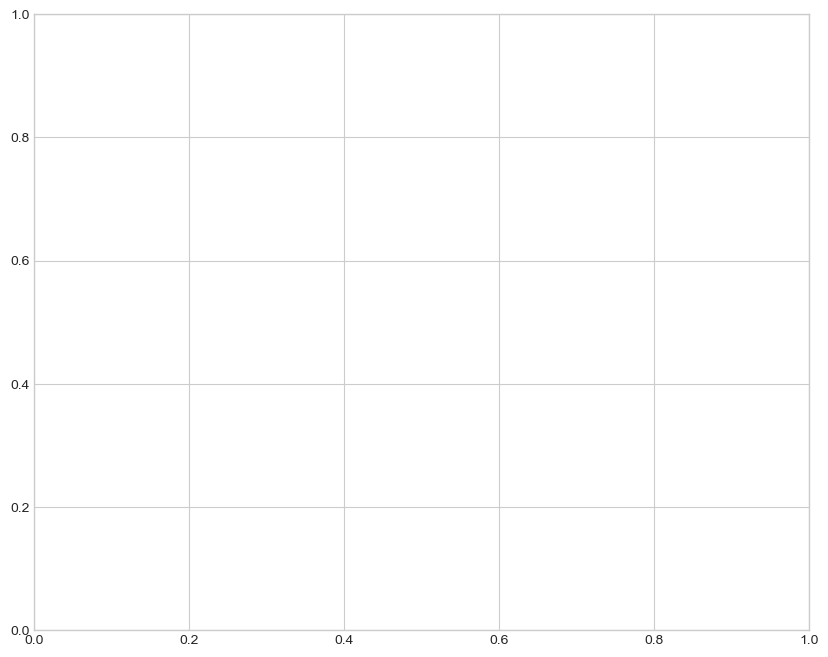

In [10]:
# Créer toutes les visualisations
output_dir = "validation_results"

create_validation_plots(
    df_delta=df_delta,
    metrics=metrics,
    save_dir=output_dir,
    top_k_viz=20
)

print(f"\n✅ Tous les plots sauvegardés dans {output_dir}/")

## 5. Exporter le Rapport LaTeX

In [ ]:
# Générer le rapport LaTeX
latex_report = generate_latex_report(
    metrics=metrics,
    output_path=f"{output_dir}/validation_report.tex"
)

# Afficher un extrait (sans erreur de décodage)
print("\n📄 EXTRAIT DU RAPPORT LATEX:")
print(latex_report[:800] + "\n...")

## 6. Sauvegarder les Métriques en JSON

In [ ]:
# Sauvegarder en JSON pour réutilisation
metrics.save_json(f"{output_dir}/validation_metrics.json")

# Recharger pour vérifier
import json
with open(f"{output_dir}/validation_metrics.json", 'r') as f:
    metrics_dict = json.load(f)

print("\n📦 Métriques sauvegardées:")
print(json.dumps(metrics_dict, indent=2)[:500] + "\n...")

## 7. Analyse des Entreprises Mal Prédites

In [12]:
# Ajouter les croissances réelles au DataFrame
df_delta['degree_before'] = df_delta['final_configuration'].apply(
    lambda comp: B_train.degree(comp) if comp in B_train else 0
)
df_delta['degree_after'] = df_delta['final_configuration'].apply(
    lambda comp: B_test.degree(comp) if comp in B_test else 0
)
df_delta['degree_growth'] = df_delta['degree_after'] - df_delta['degree_before']

# Top 20 prédites
top_20_predicted = df_delta.nlargest(20, 'techrank_delta')

# Faux positifs: bien classées mais pas de croissance
false_positives = top_20_predicted[top_20_predicted['degree_growth'] <= 0]

print("\n❌ FAUX POSITIFS (Top-20 sans croissance réelle):")
if len(false_positives) > 0:
    for idx, row in false_positives.iterrows():
        print(f"   {row['final_configuration'][:50]}: "
              f"TechRank Δ={row['techrank_delta']:.4f}, Degree Δ={int(row['degree_growth'])}")
else:
    print("   Aucun! Tous les top-20 ont eu une croissance.")

# Vrais positifs
true_positives = top_20_predicted[top_20_predicted['degree_growth'] > 0]
print(f"\n✅ VRAIS POSITIFS: {len(true_positives)}/20 ({len(true_positives)/20*100:.0f}%)")


❌ FAUX POSITIFS (Top-20 sans croissance réelle):
   Science Creates: TechRank Δ=0.1273, Degree Δ=-2
   Great Lakes Crystal Technologies: TechRank Δ=0.1238, Degree Δ=-2
   QxBranch: TechRank Δ=0.1235, Degree Δ=-5
   Qbrics, Inc: TechRank Δ=0.1150, Degree Δ=-5
   Quantistry: TechRank Δ=0.0847, Degree Δ=-3
   Nullspace Inc.: TechRank Δ=0.0784, Degree Δ=-1
   QC Ware: TechRank Δ=0.0691, Degree Δ=-10
   M Squared Lasers: TechRank Δ=0.0684, Degree Δ=-5
   Numerica Corporation: TechRank Δ=0.0681, Degree Δ=-1
   ORCA Computing: TechRank Δ=0.0671, Degree Δ=-6
   Quantum Dice: TechRank Δ=0.0663, Degree Δ=-9
   Analog Quantum Circuits: TechRank Δ=0.0661, Degree Δ=-1
   Quside: TechRank Δ=0.0656, Degree Δ=-5
   Quantopo: TechRank Δ=0.0656, Degree Δ=-1
   BosonQ Psi: TechRank Δ=0.0656, Degree Δ=-12
   Global Telecom: TechRank Δ=0.0599, Degree Δ=-1
   Quantinuum: TechRank Δ=0.0587, Degree Δ=-5
   Cambridge Future Tech: TechRank Δ=0.0532, Degree Δ=-1
   IonQ: TechRank Δ=0.0523, Degree Δ=-25

✅ VRAIS

In [13]:
# Faux négatifs: forte croissance mais mal classées
high_growth = df_delta[df_delta['degree_growth'] >= 5]  # Au moins +5 investisseurs
high_growth_sorted = high_growth.sort_values('techrank_delta', ascending=False)

# Celles qui ne sont PAS dans le top-50
top_50_predicted_set = set(df_delta.nlargest(50, 'techrank_delta')['final_configuration'])
missed = high_growth_sorted[~high_growth_sorted['final_configuration'].isin(top_50_predicted_set)]

print("\n⚠️ FAUX NÉGATIFS (forte croissance mais hors top-50):")
if len(missed) > 0:
    print(f"   Total: {len(missed)}")
    print("\n   Exemples:")
    for idx, row in missed.head(10).iterrows():
        print(f"   {row['final_configuration'][:50]}: "
              f"Degree Δ={int(row['degree_growth'])}, TechRank Δ={row['techrank_delta']:.4f}")
else:
    print("   Aucun! Toutes les entreprises à forte croissance ont été détectées.")


⚠️ FAUX NÉGATIFS (forte croissance mais hors top-50):
   Total: 4

   Exemples:
   Project 11: Degree Δ=5, TechRank Δ=-0.0025
   BlueQubit: Degree Δ=6, TechRank Δ=-0.0479
   SandboxAQ: Degree Δ=7, TechRank Δ=-0.0610
   Lightsynq: Degree Δ=7, TechRank Δ=-0.1278


## 8. Analyse de Sensibilité: Différents Seuils de Croissance

  ⚠️  Correlation not significant (p = 0.3118)
  ⚠️  Correlation not significant (p = 0.3118)
  ⚠️  Correlation not significant (p = 0.3118)
  ⚠️  Correlation not significant (p = 0.3118)


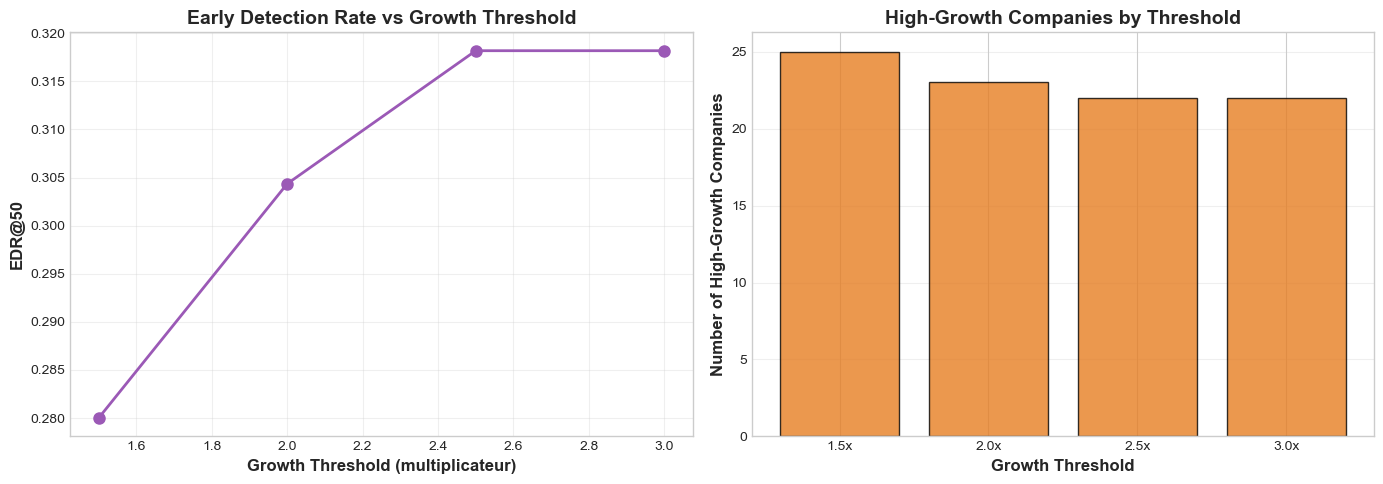


📊 ANALYSE DE SENSIBILITÉ:
   Threshold 1.5x: EDR@50=0.280, High-growth companies=25
   Threshold 2.0x: EDR@50=0.304, High-growth companies=23
   Threshold 2.5x: EDR@50=0.318, High-growth companies=22
   Threshold 3.0x: EDR@50=0.318, High-growth companies=22


In [14]:
# Tester différents seuils de croissance
thresholds = [1.5, 2.0, 2.5, 3.0]
edr_results = {}

for threshold in thresholds:
    # Recalculer les métriques avec ce seuil
    temp_metrics = compute_validation_metrics(
        df_delta=df_delta,
        B_before=B_train,
        B_after=B_test,
        top_k_list=[50],
        growth_threshold=threshold,
        prediction_horizon_days=730
    )
    edr_results[threshold] = {
        'edr_50': temp_metrics.edr_at_k[50],
        'num_high_growth': temp_metrics.companies_high_growth
    }

# Visualiser
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# EDR@50 vs threshold
ax1.plot(thresholds, [edr_results[t]['edr_50'] for t in thresholds],
         marker='o', linewidth=2, markersize=8, color='#9b59b6')
ax1.set_xlabel('Growth Threshold (multiplicateur)', fontweight='bold')
ax1.set_ylabel('EDR@50', fontweight='bold')
ax1.set_title('Early Detection Rate vs Growth Threshold', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Nombre d'entreprises à forte croissance vs threshold
ax2.bar(range(len(thresholds)), [edr_results[t]['num_high_growth'] for t in thresholds],
        color='#e67e22', alpha=0.8, edgecolor='black')
ax2.set_xticks(range(len(thresholds)))
ax2.set_xticklabels([f'{t}x' for t in thresholds])
ax2.set_xlabel('Growth Threshold', fontweight='bold')
ax2.set_ylabel('Number of High-Growth Companies', fontweight='bold')
ax2.set_title('High-Growth Companies by Threshold', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 ANALYSE DE SENSIBILITÉ:")
for threshold in thresholds:
    print(f"   Threshold {threshold}x: EDR@50={edr_results[threshold]['edr_50']:.3f}, "
          f"High-growth companies={edr_results[threshold]['num_high_growth']}")

## Conclusion

Ce notebook a démontré comment utiliser le module `temporal_validation.py` pour évaluer rigoureusement les prédictions TGN-TechRank.

### Points clés:

1. **Precision@K** mesure si le modèle identifie correctement les entreprises prometteuses
2. **Rank Correlation** (Spearman) mesure la qualité globale du classement
3. **Early Detection Rate** mesure la capacité à détecter les entreprises à forte croissance
4. **Lift Score** compare le modèle aux baselines naïves
5. **Lead Time** quantifie l'avance temporelle de la prédiction

### Prochaines étapes:

- Tester différentes configurations α, β pour TechRank
- Analyser l'impact des hyperparamètres TGN
- Comparer avec d'autres méthodes (GCN, GraphSAGE, etc.)
- Enrichir les features de nœuds (texte, métadonnées)

## 🔍 INTERPRÉTATION DÉTAILLÉE DES RÉSULTATS

### ⚠️ DIAGNOSTIC : Performance Actuelle TRÈS FAIBLE

Vos résultats montrent que le modèle TGN-TechRank **ne fonctionne PAS** dans sa configuration actuelle pour prédire les entreprises prometteuses.